# Expanding the measurement of culture with a sample of two billion humans

## Replication Data and Code

This notebook provides all the steps to replicate the results of our paper [Expanding the measurement of culture with a sample of two billion humans](https://doi.org/10.1098/rsif.2022.0085) published in the *Journal of the Royal Society Interface 19:20220085* (2022).

# Replication density plots

# Setup and Pre-requisites

Let's start by importing the required packages

In [1]:
#!/usr/bin/env python
# coding: utf-8
'''
 ======================================================
Author:  Ömer Özak, 2014 (ozak at smu.edu)
Website: http://omerozak.com
GitHub:  https://github.com/ozak/
 ======================================================
Program to produce distances for comparison with FB
'''
#%pylab --no-import-all
%matplotlib inline

import sys, os, time
import numpy as np
import pandas as pd
pd.set_option('display.width', 160)
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances, manhattan_distances, pairwise_distances
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import spatial, stats
from scipy.stats import zscore
import MantelTest.MantelTest as MantelTest
from scipy.stats import pearsonr
import pycountry
import re
import seaborn as sns

In [2]:
pathfb = './data/'
pathfbor = './data/OriginalData/'
pathout = pathfb + 'CohesionMain/'
pathcohesion = pathfb + 'CohesionMain/'
pathcenters = pathfb + 'CulturalCenters/'
if os.path.exists(pathout) == False:
    os.mkdir(pathout)
pathshare = pathout
if os.path.exists(pathcohesion) == False:
    os.mkdir(pathcohesion)

## Import data

In [3]:
histodat = pd.read_stata(pathout + 'histodat.dta')
histodat_gender = pd.read_stata(pathout + 'histodatgender.dta')

In [4]:
# Plot settings
SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
name_dict = {'BE':'A',
 'BR':'K',
 'DE':'C',
 'ES':'H',
 'FR':'B',
 'GB':'I',
 'IE':'D',
 'IN':'Q',
 'IT':'E',
 'KE':'N',
 'MU':'O',
 'MX':'M',
 'NG':'P',
 'NL':'F',
 'PT':'G',
 'SV':'L',
 'TH':'R',
 'US':'J'}

In [28]:
# Plot Functions

def KDEPlot(country_code, histodat, histodat_gender, dist='FBdist', fileext='', same_axis=False, pathout=pathout):
    dffig = histodat.loc[histodat.country_code_1==country_code][dist]
    FMdist = histodat_gender.loc[histodat_gender.country_code_1==country_code]['FBdist']
    country = pycountry.countries.get(alpha_2=country_code).name
    fig, ax = plt.subplots(figsize=(15,10))
    sns.kdeplot(dffig, ax=ax, shade=True, label='Regional', linewidth=2)
    ax.axvline(FMdist.values, c='red', alpha=1, label='Gender', linewidth=2)
    ax.legend()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    #ax.set_title('Facebook Cultural Distance in ' + country, fontdict={'fontsize':36})
    ax.set_xlabel('Facebook Distance', fontsize=32)
    ax.set_ylabel('Density', fontsize=32)
    if same_axis==True:
        ax.set_xlim([0,np.ceil(np.max([histodat[dist].max(),histodat_gender['FBdist'].max()]) * 10) / 10])
    #plt.savefig(pathout + country_code + 'RegionalHisto' + fileext + '.pdf', dpi=300, bbox_inches='tight')
    #plt.savefig(pathout + country_code + 'RegionalHisto' + fileext + '.png', dpi=300, bbox_inches='tight')
    plt.savefig(pathout + 'Figure-B15-' + name_dict[country_code] + '.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    pass


In [29]:
country_code = 'BE'

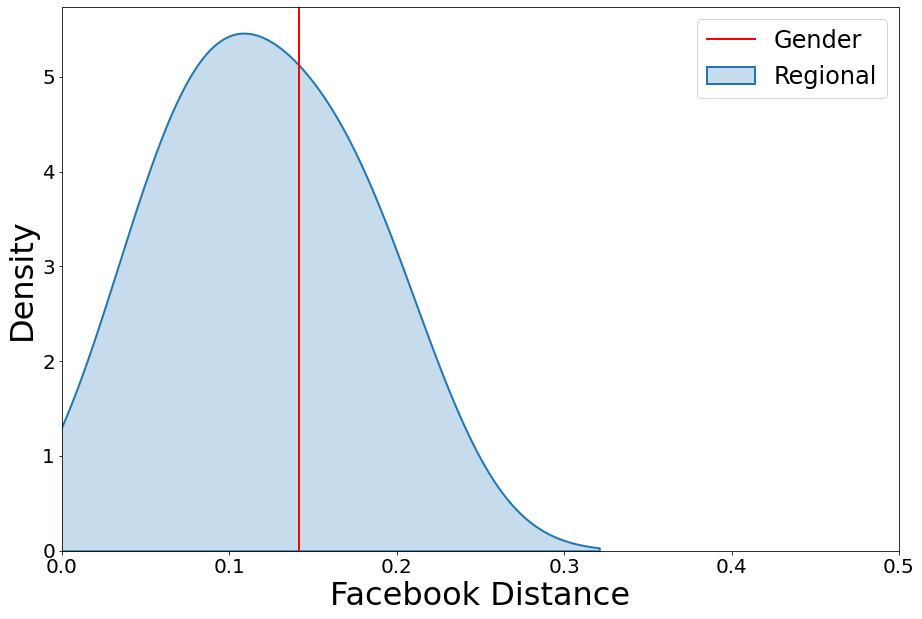

In [30]:
KDEPlot(country_code, histodat, histodat_gender, same_axis=True, fileext='_sameaxis', pathout=pathout)

Belgium


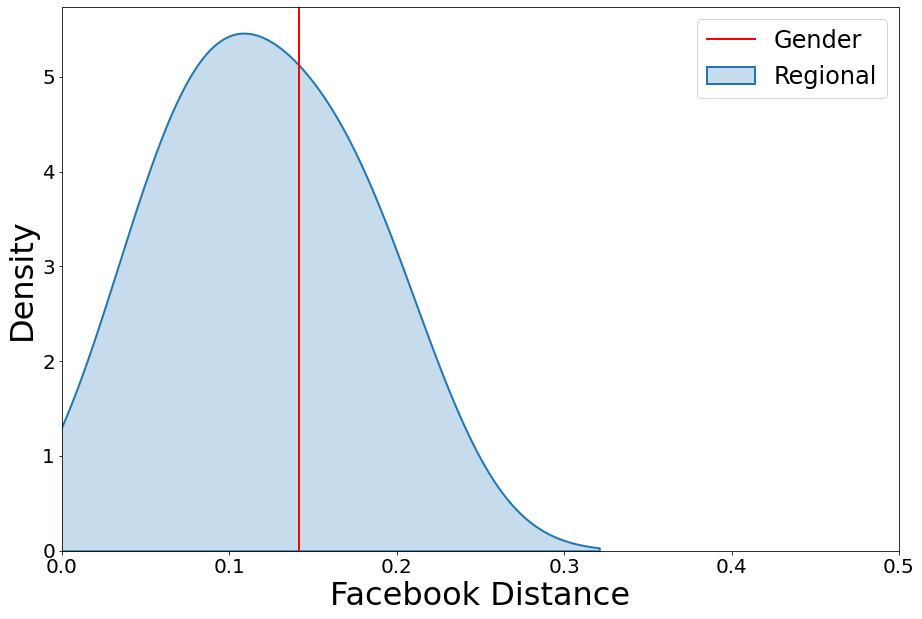

Brazil


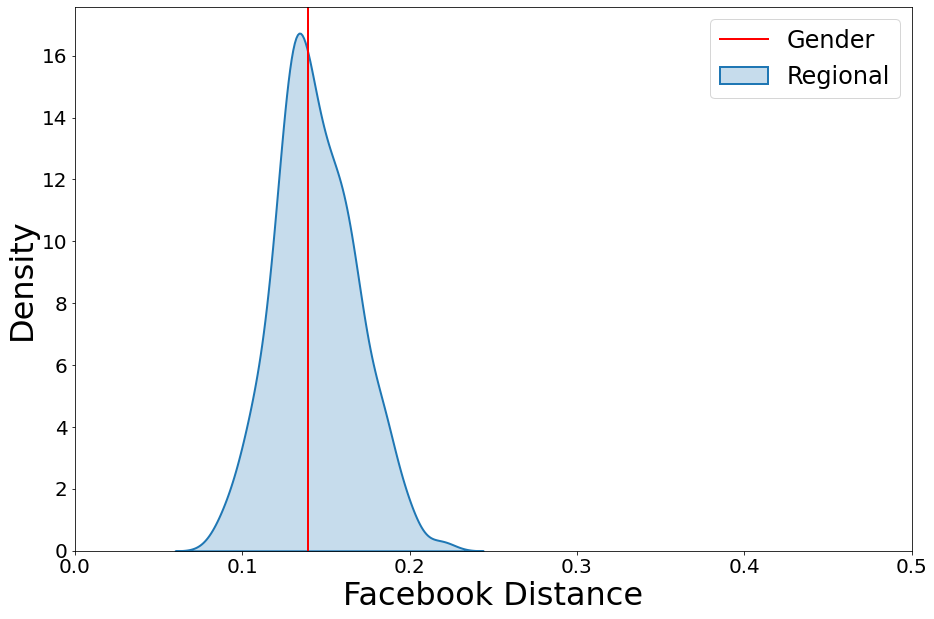

Germany


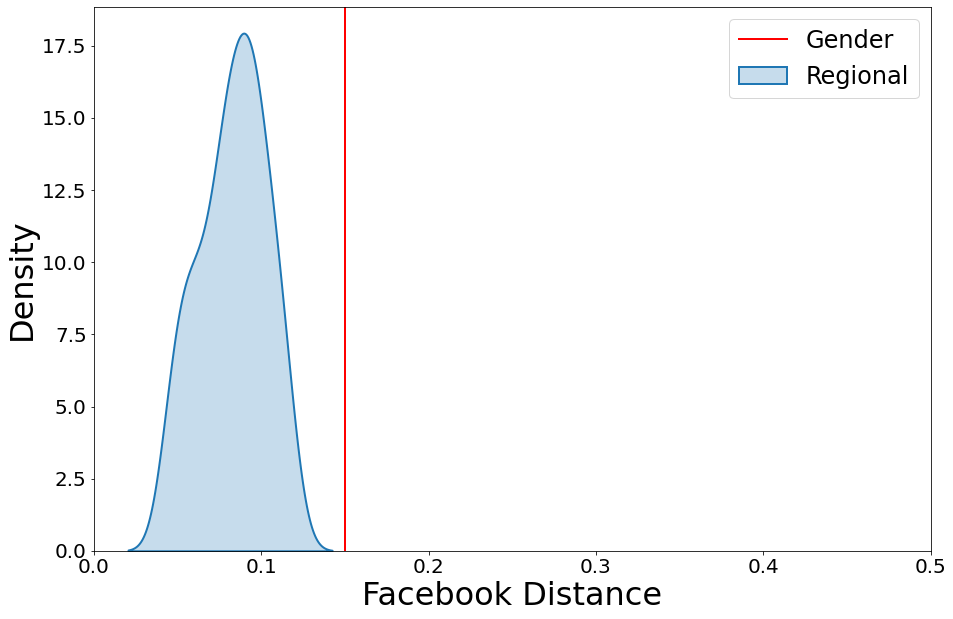

Spain


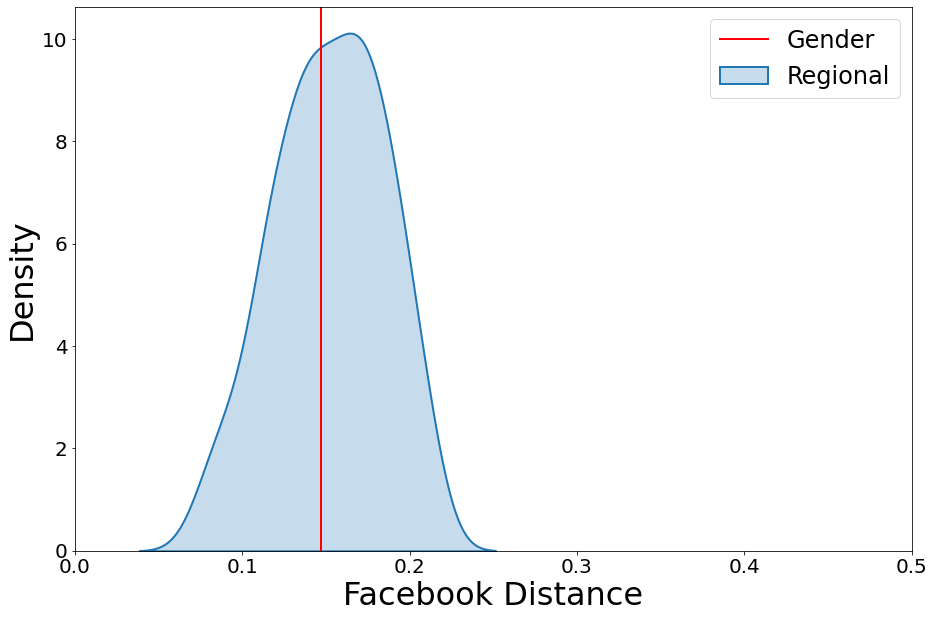

France


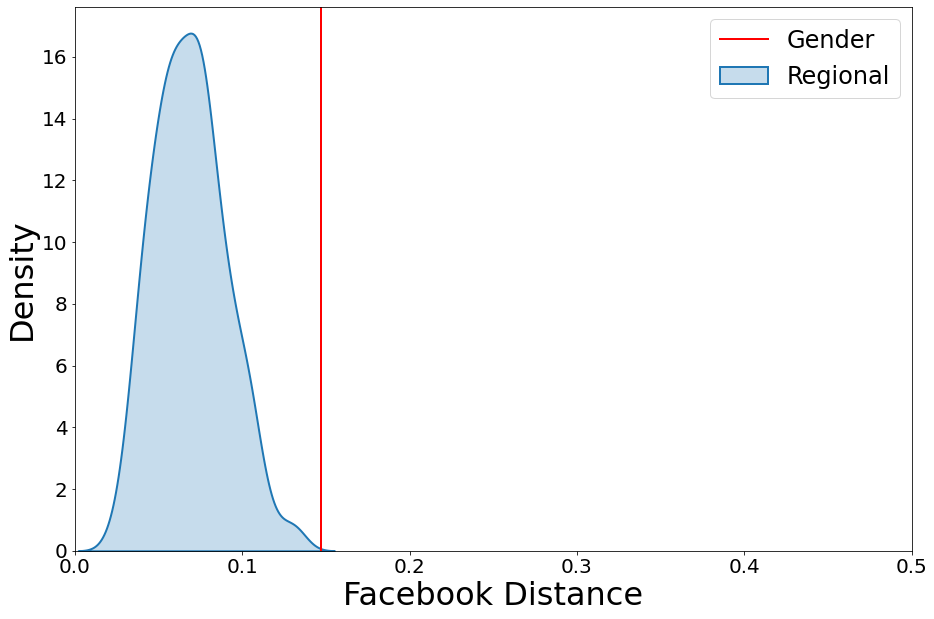

United Kingdom


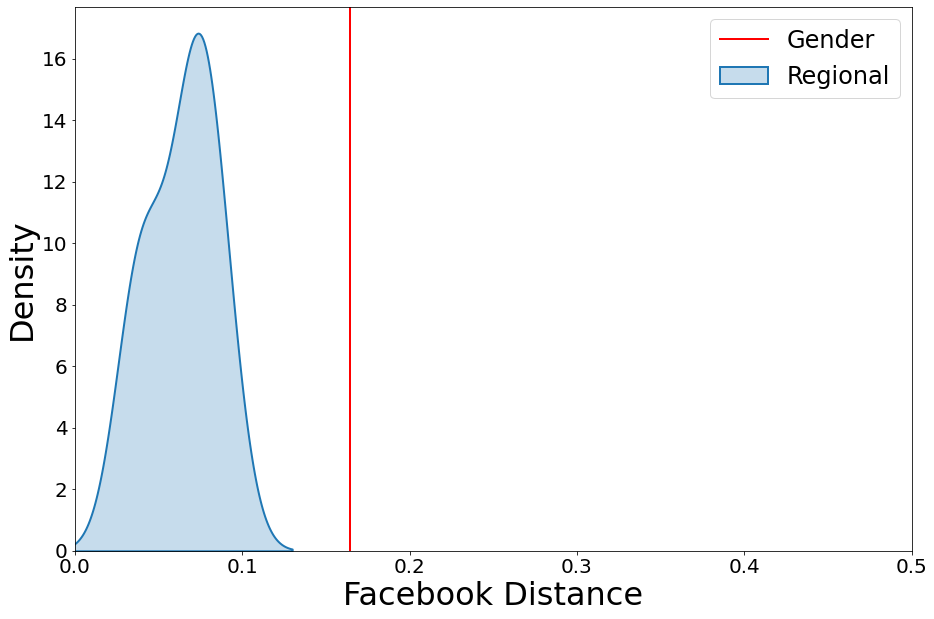

Ireland


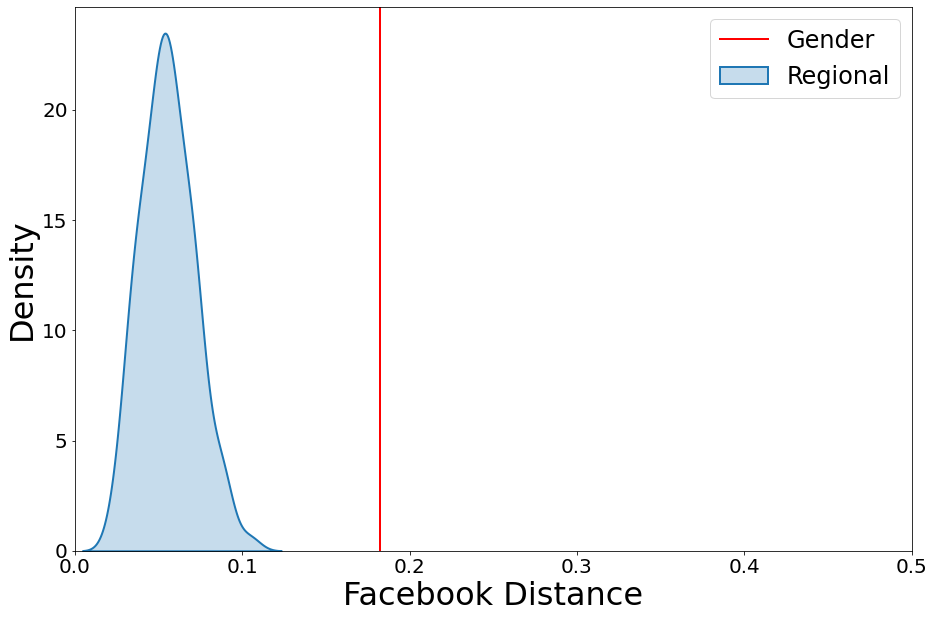

India


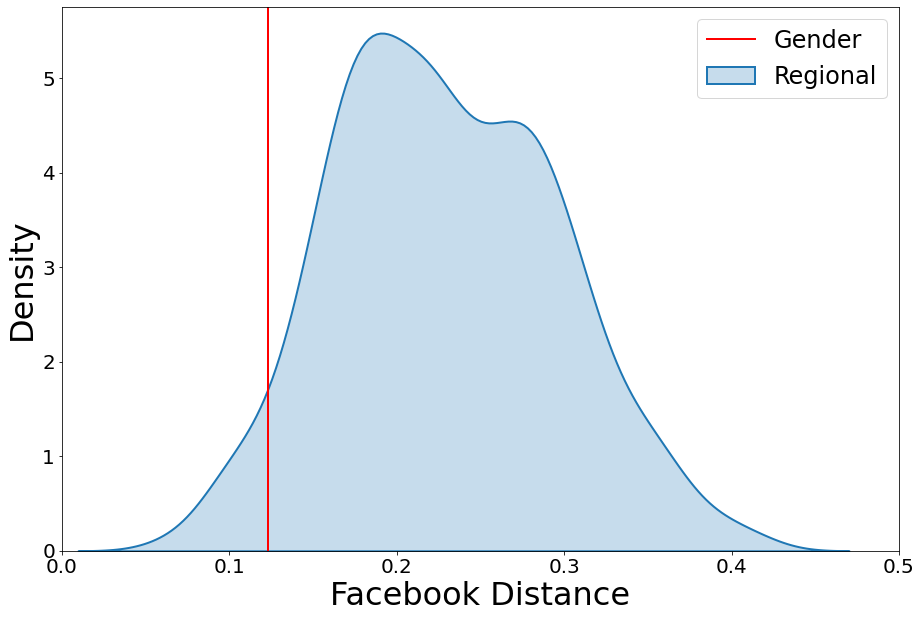

Italy


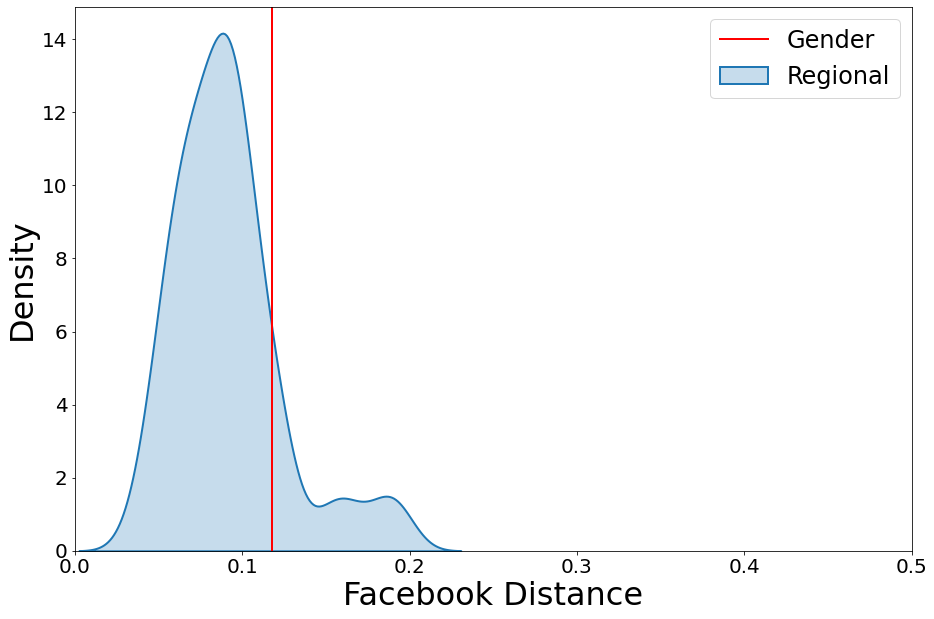

Kenya


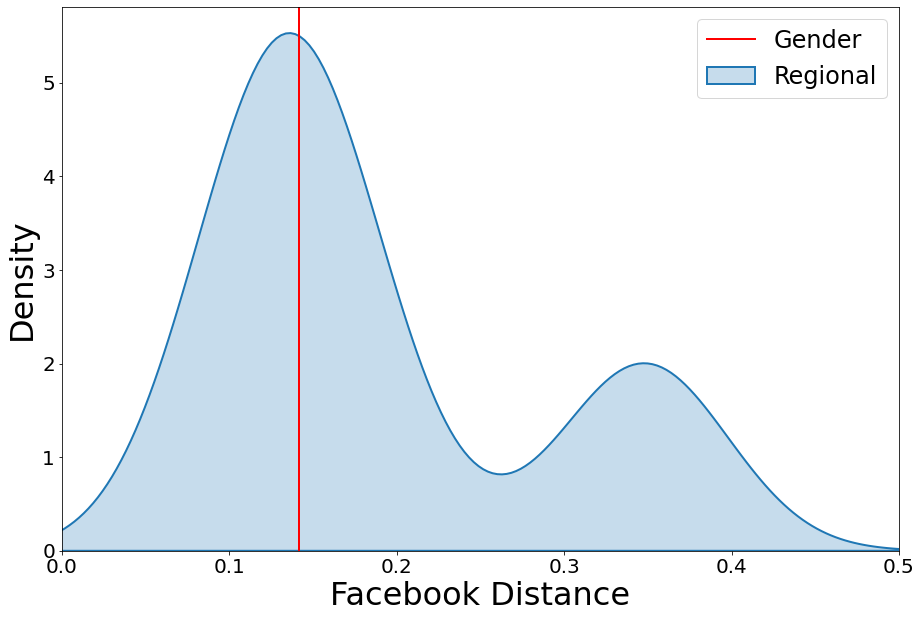

Mauritius


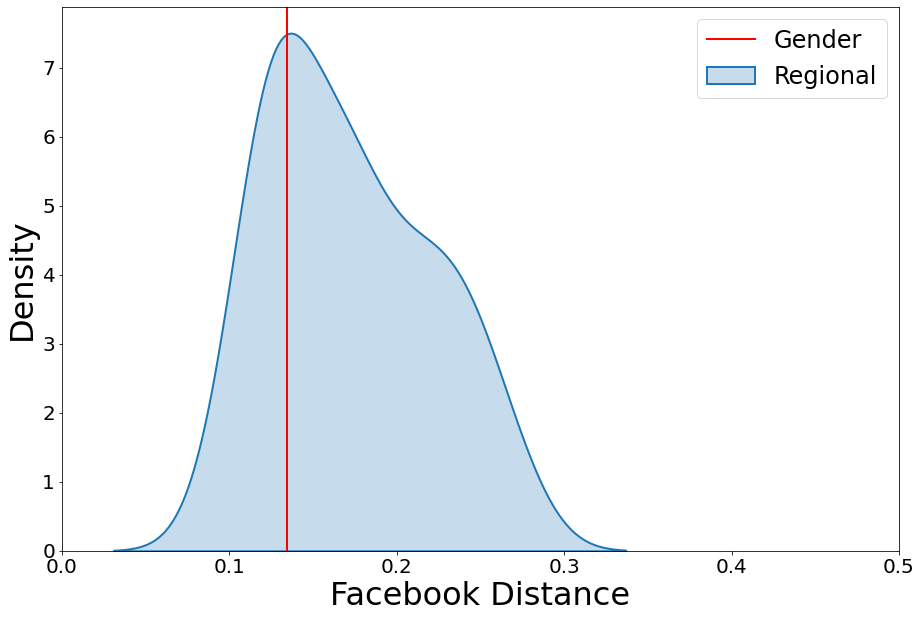

Mexico


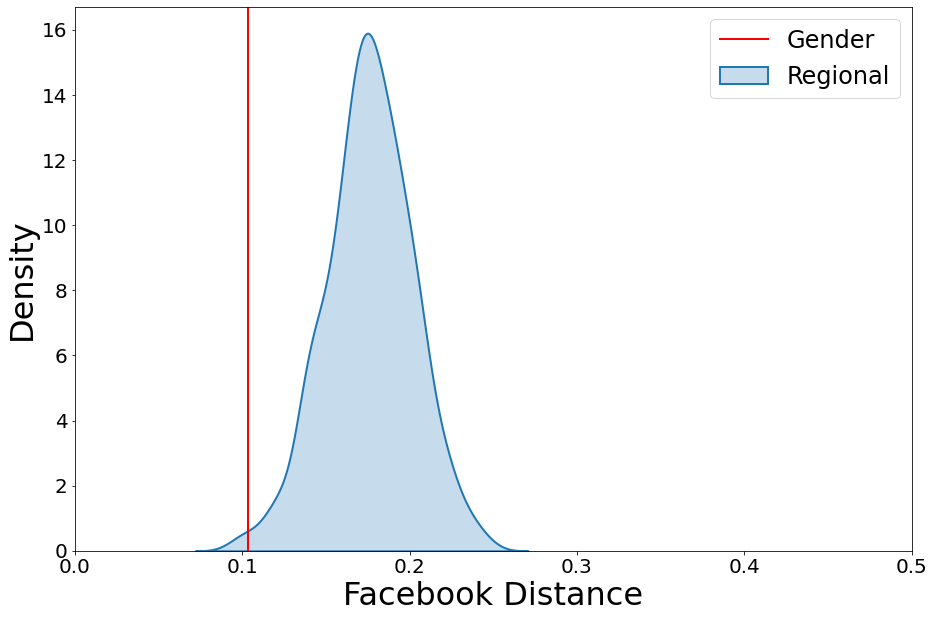

Nigeria


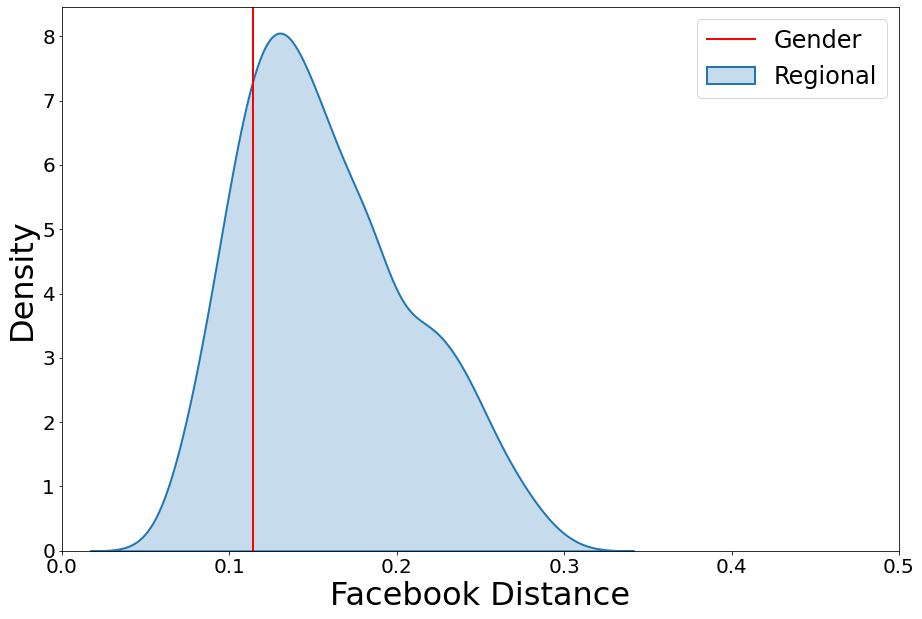

Netherlands


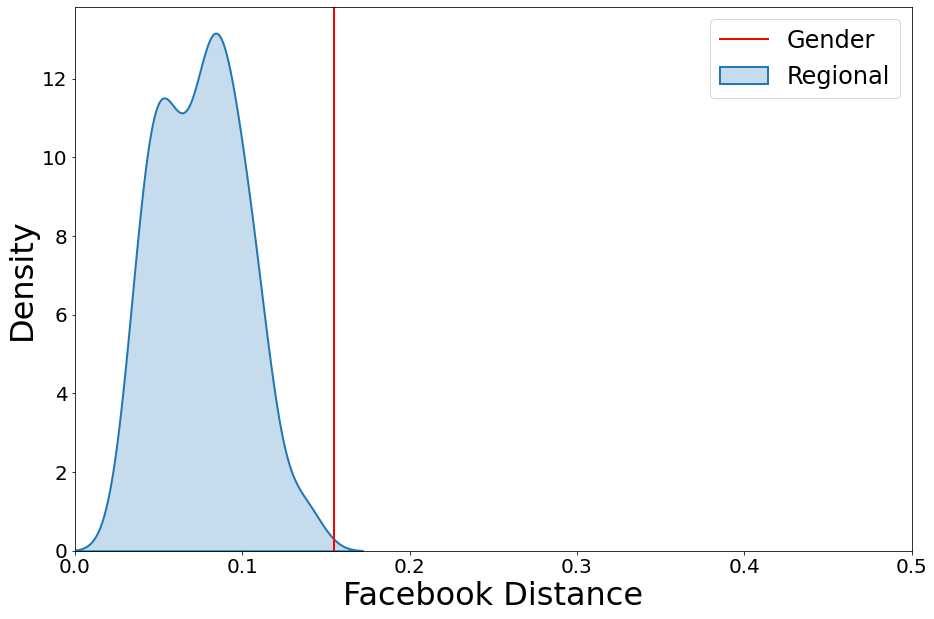

Portugal


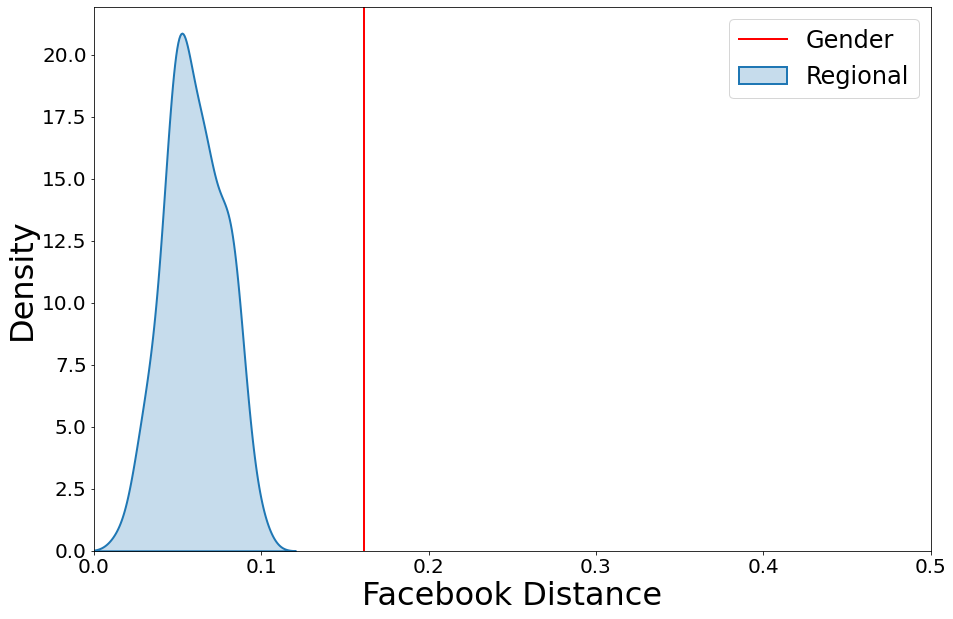

El Salvador


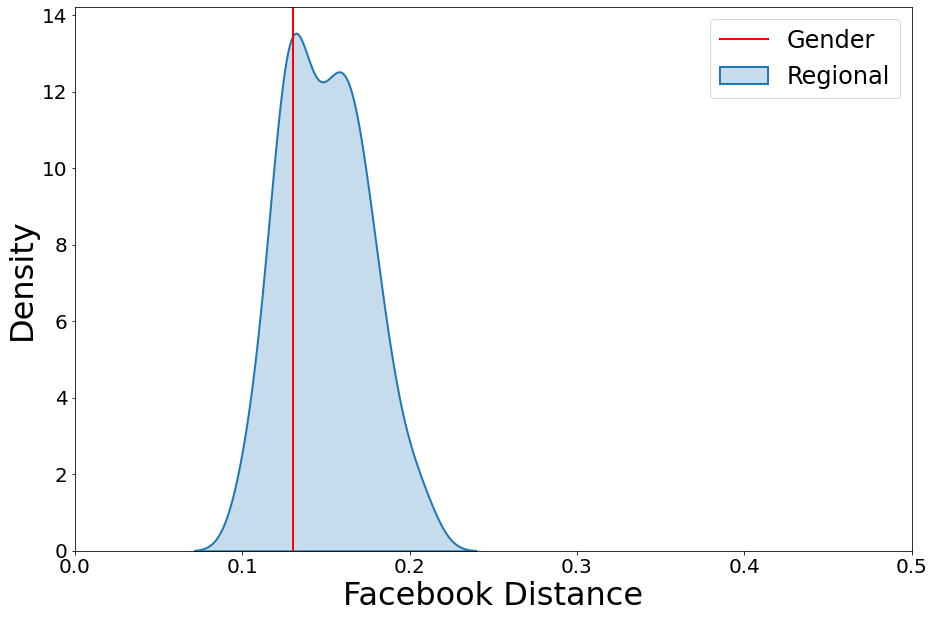

Thailand


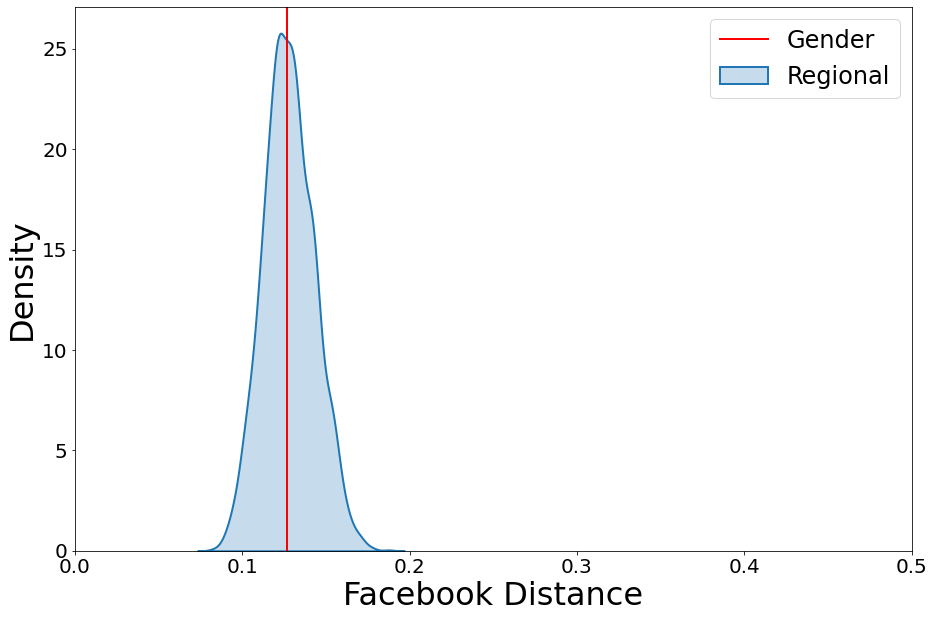

United States


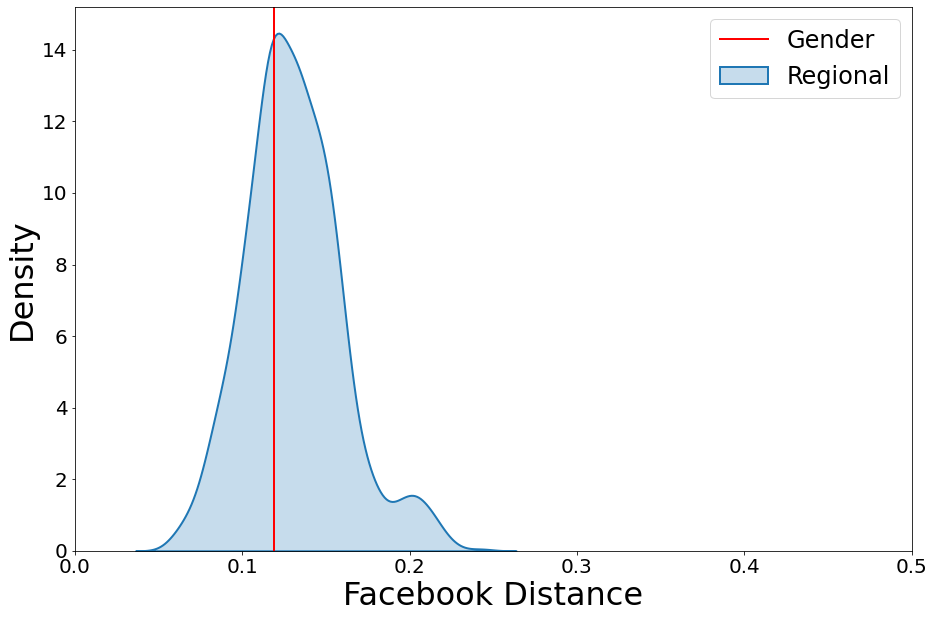

In [32]:
for country_code in histodat_gender.country_code_1:
    print(pycountry.countries.get(alpha_2=country_code).name)
    KDEPlot(country_code, histodat, histodat_gender, same_axis=True, fileext='_sameaxis', pathout=pathout)